# Using Decision Trees for Predicting Real Estate Valuation

### ***Yabra Muvdi***


Home valuation is key in real estate industry, and also the basis for mortgages in credit sector. Here we have to predict the estimated value of a property. The data consists of a list of features plus the resulting $parcelvalue$, described in *Case_data_dictionary.xlsx* file. Each row corresponds to a particular home valuation, and $transactiondate$ is the date when the property was effectively sold. Properties are defined by $lotid$, but be aware that one property can be sold more than once (it's not the usual case). Also notice that some features are sometime empty, your model has to deal with it. Note that you don't have to use $totaltaxvalue$, $buildvalue$ or $landvalue$, because they are closely correlated with the final value to predict.

## Step 1: Read and explore data, report missing data

In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pylab as plt

In [127]:
#import the data
data = pd.read_csv('Regression_Supervised_Train_reduced.csv')

In [128]:
#Understand the size of the data set
data.shape

(24755, 48)

In [129]:
#Initial overview of the data
data.describe()

,lotid,logerror,aircond,style,basement,numbath,numbedroom,classbuild,qualitybuild,decktype,...,unitnum,year,numstories,buildvalue,parcelvalue,taxyear,landvalue,totaltaxvalue,taxdelinquencyyear,mypointer
count,2.475500e+04,1763.000000,14464.000000,233.000000,56.000000,24755.000000,24755.000000,18.000000,14654.000000,712.0,...,14761.000000,24743.000000,9634.000000,2.475200e+04,2.475500e+04,24755.000000,2.475500e+04,24754.000000,886.000000,24755.000000
mean,1.335009e+07,0.012562,2.107232,7.141631,636.839286,2.603514,3.297637,3.833333,5.640235,66.0,...,1.006300,1972.886473,1.540378,2.382736e+05,5.430185e+05,2015.281761,3.047738e+05,6665.055184,13.969526,17672.183559
std,3.444823e+06,0.129091,3.384228,2.051415,488.847319,1.045068,1.072567,0.383482,2.251645,0.0,...,0.123305,18.745019,0.531651,2.928330e+05,7.259855e+05,0.449867,4.930763e+05,8999.000816,1.523517,10215.193608
min,1.071173e+07,-0.605100,1.000000,2.000000,68.000000,0.000000,0.000000,3.000000,1.000000,66.0,...,1.000000,1880.000000,1.000000,1.010000e+02,1.562300e+04,2015.000000,1.300000e+02,49.080000,6.000000,1.000000
25%,1.108076e+07,-0.026479,1.000000,7.000000,255.000000,2.000000,3.000000,4.000000,4.000000,66.0,...,1.000000,1961.000000,1.000000,1.141252e+05,2.396560e+05,2015.000000,9.468850e+04,3042.225000,14.000000,8850.500000
50%,1.212766e+07,0.005000,1.000000,7.000000,556.000000,2.500000,3.000000,4.000000,6.000000,66.0,...,1.000000,1974.000000,2.000000,1.725460e+05,3.842500e+05,2015.000000,1.936930e+05,4744.815000,14.500000,17660.000000
75%,1.467828e+07,0.036462,1.000000,7.000000,929.250000,3.000000,4.000000,4.000000,7.000000,66.0,...,1.000000,1986.000000,2.000000,2.631998e+05,6.090000e+05,2016.000000,3.548305e+05,7387.355000,15.000000,26537.500000
max,1.629608e+08,2.489000,13.000000,21.000000,2485.000000,19.000000,11.000000,4.000000,12.000000,66.0,...,9.000000,2016.000000,3.000000,1.023363e+07,2.563981e+07,2016.000000,2.430208e+07,311386.080000,15.000000,35363.000000


### 1.1. Initial exploration of the variable of interest (*parcel value*)

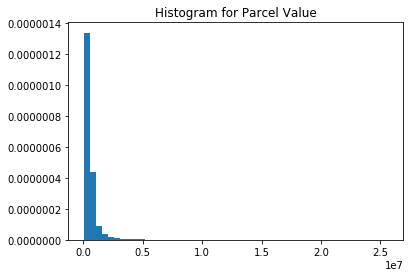

In [130]:
plt.hist(data.parcelvalue, density = True, bins = 50)
plt.title('Histogram for Parcel Value')
plt.show()

From this initial histogram we can see that we are dealing with highly skewed data. Prediction is going to do be difficult if we do not thing of a sound strategy to deal with this. A first approach could be to transform the variable with the $\log$ function.

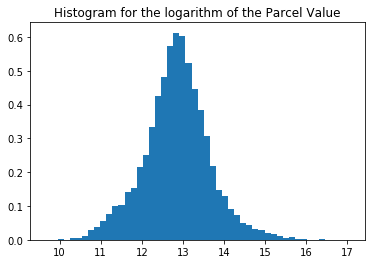

In [131]:
plt.hist(np.log(data.parcelvalue), density = True, bins = 50)
plt.title('Histogram for the logarithm of the Parcel Value')
plt.show()

With this simple transformation we now have a distribution of the parcel value that is not skewed and appears to be gaussian.

### 1.2. Exploration of missing data

In [132]:
#Exploring the pressence of missing values (as a percentage of all the observartions)
missing = data.isna().sum()/data.shape[0]

In [133]:
missing

lotid                 0.000000
logerror              0.928782
transactiondate       0.928782
aircond               0.415714
style                 0.990588
basement              0.997738
numbath               0.000000
numbedroom            0.000000
classbuild            0.999273
qualitybuild          0.408039
decktype              0.971238
finishedarea1st       0.751848
finishedarea          0.002545
perimeterarea         1.000000
totalarea             0.997495
finishedareaEntry     0.751848
countycode            0.000000
numfireplace          0.000000
numfullbath           0.001454
garagenum             0.596284
garagearea            0.596284
tubflag               0.949707
heatingtype           0.362189
latitude              0.000000
longitude             0.000000
lotarea               0.028641
poolnum               0.486124
poolarea              0.951283
citycode              0.001252
countycode2           0.000000
neighborhoodcode      0.392971
regioncode            0.000081
roomnum 

Lets build a function to make this output more understandable.

In [134]:
def missing_report(df, low=0.15, medium=0.35):
    """Function for creating a simple report on the presence of missing values 
    of a data set ussing the thresholds provided as parameters
    """
    
    #create series with percentage of missing values per column
    missing = df.isna().sum()/df.shape[0]
    
    #1. features with no missing values
    no_nas = missing[missing == 0]
    
    print('\n **************************************************************************************** \n', 
          '                 ', 'Features with no missing values: ', len(no_nas), '                  ',
          '\n ****************************************************************************************')
    
    #2. features with 'low' number of missing values
    low_nas = missing[(missing <= low) & (missing > 0)]
    
    print('\n **************************************************************************************** \n', 
          '      ', 'Features with ', low*100, '% or less missing values: ', len(low_nas), '        ',
          '\n ****************************************************************************************')
    
    #3. features with 'medium' number of missing values
    medium_nas = missing[(missing <= medium) & (missing > low)]
    
    print('\n **************************************************************************************** \n', 
          ' ', 'Features with missing values between', low*100, '% and ', medium*100, '% : ', len(medium_nas),' ',
          '\n ****************************************************************************************')
    
    if len(medium_nas) > 0:
        plt.figure(figsize=(20,10))
        plt.barh(medium_nas.index, medium_nas)
        plt.title('Features with medium number of missing values')
        plt.show()
    
    #4. features with 'large' number of missing values
    large_nas = missing[(missing >= medium)]
    
    print('\n **************************************************************************************** \n', 
          'WARNING: ', 'Features with ', medium*100, '% or more missing values: ', len(large_nas), '        ',
          '\n ****************************************************************************************')
    
    if len(large_nas) > 0:
        plt.figure(figsize=(20,10))
        plt.barh(large_nas.index, large_nas)
        plt.title('Features with large number of missing values')
        plt.show()
    


 **************************************************************************************** 
                   Features with no missing values:  13                    
 ****************************************************************************************

 **************************************************************************************** 
        Features with  15.0 % or less missing values:  8          
 ****************************************************************************************

 **************************************************************************************** 
   Features with missing values between 15.0 % and  35.0 % :  0   
 ****************************************************************************************

 **************************************************************************************** 
 ****************************************************************************************


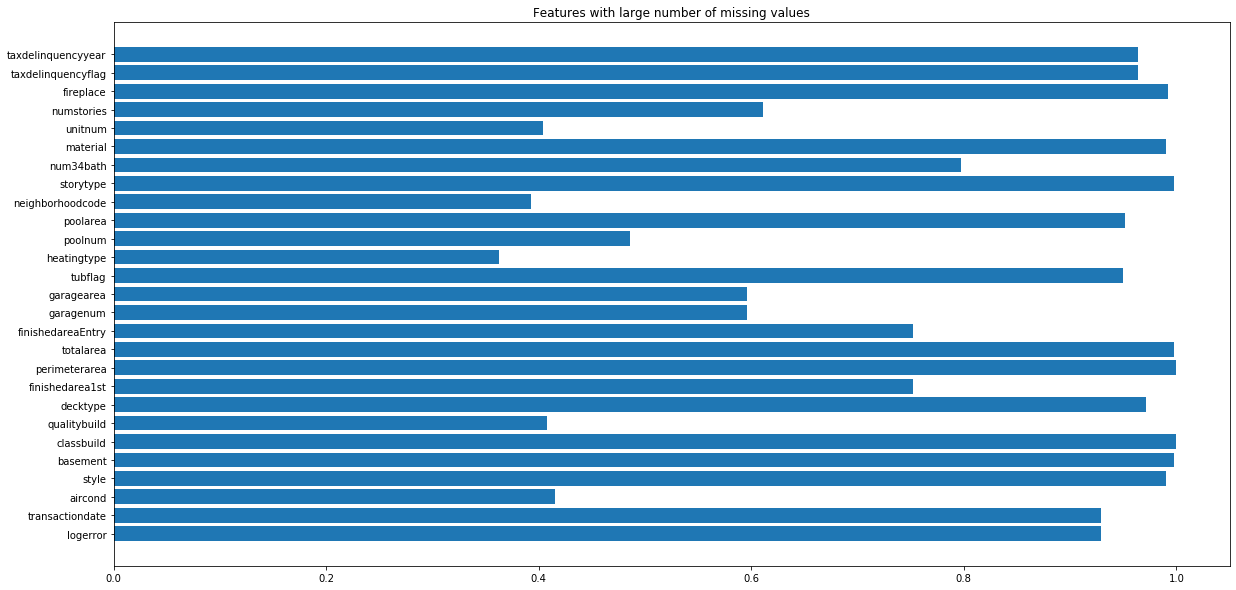

In [135]:
missing_report(data)

Missing values are clearly an important issue that deserves consideration for this dataset. We will do this in the following step.

## Step 2: Remove features with missing data, and then observations with missing data

Dealing with missing data is difficult. It is not always clear when a feature has such a low amount of available data that maybe it is not worth considering. We will try an approach that uses different tools to deal with missing data hoping that it does a sensible job. The steps to clean the data will be the following:

1. Remove the features with more than 80% of missing data. It seems that whatever we do with these features we would be introducing very noisy measures.
2. Use sklearn IterativeImputer to impute the rest of the missing data.
3. Test how results change if we use a different threshold for removing features.

### Step 2.1. : Handling features with a really high percentage of missing values (> 80%)

In [136]:
#lets start by making a copy of the data
df = data.copy()

In [137]:
# Lets try with 80%
high_missing = df.columns[missing > 0.8]

In [138]:
len(high_missing)

15

In [139]:
df2 = df.drop(axis=1,labels = high_missing)

In [140]:
df2.shape

(24755, 33)

By dropping these features we have now reduce our dataset to 33 features. This is potentially good because we will be shortly introducing new varibles when creating dummies and categorical features.

### Step 2.2. Imputing missing data

I tried to imputting missing data using the IterativeImputer from sklearn. However, I found that it could to interpret the results of the imputation since most of the variables are categorical and the imputer is going to give values really different from the categories 'allowed'. For this reason, I will pursue a simpler apporach using SimpleImputer.

In [141]:
# explicitly require this experimental feature
#from sklearn.experimental import enable_iterative_imputer
# now we can import normally from sklearn.impute
#from sklearn.impute import IterativeImputer
#imputer = IterativeImputer(initial_strategy = 'median', random_state = 92)
#imputer
#df_imp = imputer.fit_transform(df2)

In [142]:
from sklearn.impute import SimpleImputer
simp_imputer = SimpleImputer(strategy = 'median')
simp_imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [143]:
df_imp = simp_imputer.fit_transform(df2)

In [144]:
#Save the imputer
import pickle
filename = 'simple_imputer.sav'
pickle.dump(simp_imputer, open(filename, 'wb'))

In [145]:
df_imp.shape

(24755, 33)

In [146]:
#reconvert the imputed data into a pandas DataFrame
df_imp = pd.DataFrame(df_imp, columns = df2.columns)

In [147]:
df_imp

,lotid,aircond,numbath,numbedroom,qualitybuild,finishedarea1st,finishedarea,finishedareaEntry,countycode,numfireplace,...,num34bath,unitnum,year,numstories,buildvalue,parcelvalue,taxyear,landvalue,totaltaxvalue,mypointer
0,17214744.0,1.0,2.0,3.0,6.0,1255.0,1255.0,1255.0,6111.0,1.0,...,1.0,1.0,1979.0,1.0,103993.0,142212.0,2015.0,38219.0,1715.08,25711.0
1,12018724.0,1.0,2.0,1.0,4.0,1300.0,1033.0,1301.0,6037.0,0.0,...,1.0,1.0,1973.0,2.0,129428.0,301141.0,2015.0,171713.0,3851.88,13268.0
2,11306699.0,1.0,3.0,4.0,4.0,1300.0,2982.0,1301.0,6037.0,0.0,...,1.0,1.0,2004.0,2.0,175069.0,235062.0,2015.0,59993.0,3818.24,5423.0
3,11047729.0,1.0,2.0,3.0,7.0,1300.0,1757.0,1301.0,6037.0,0.0,...,1.0,1.0,1952.0,2.0,162926.0,270543.0,2015.0,107617.0,3450.67,26198.0
4,17174848.0,1.0,3.0,2.0,6.0,1047.0,1951.0,1047.0,6111.0,0.0,...,1.0,1.0,1988.0,2.0,180532.0,300886.0,2015.0,120354.0,3394.26,25187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24750,11633053.0,1.0,3.0,2.0,7.0,1300.0,1382.0,1301.0,6037.0,0.0,...,1.0,1.0,1982.0,2.0,214623.0,786817.0,2016.0,572194.0,9550.24,8421.0
24751,10751511.0,1.0,2.0,2.0,7.0,1300.0,1127.0,1301.0,6037.0,0.0,...,1.0,1.0,1973.0,2.0,96981.0,282464.0,2015.0,185483.0,4086.50,29610.0
24752,10719915.0,1.0,2.0,4.0,6.0,1300.0,2179.0,1301.0,6037.0,0.0,...,1.0,1.0,1962.0,2.0,102310.0,419389.0,2016.0,317079.0,5259.98,17317.0
24753,11639212.0,1.0,5.0,5.0,10.0,1300.0,3807.0,1301.0,6037.0,0.0,...,1.0,1.0,1923.0,2.0,693832.0,3437492.0,2015.0,2743660.0,40656.13,6587.0


In [235]:
#Lets save a list with the names of the columns
variable_names = list(df_imp)
#Save the list into a txt file to use later
with open("train_database_names.txt", "w") as file:
    for col in variable_names:
        file.write(str(col) + ',')

In [148]:
#verify that we no longer have missing data left
missing_report(df_imp)


 **************************************************************************************** 
                   Features with no missing values:  33                    
 ****************************************************************************************

 **************************************************************************************** 
        Features with  15.0 % or less missing values:  0          
 ****************************************************************************************

 **************************************************************************************** 
   Features with missing values between 15.0 % and  35.0 % :  0   
 ****************************************************************************************

 **************************************************************************************** 
 ****************************************************************************************


In [149]:
#copy of the final df after imputation
df_final = df_imp.copy()

## Step 3: Feature crafting

Our database has an important number of categorical values that we would like to use in our model. But, we need to carefully think how to do this. Creating dummy variables for each category is one option. However, this turns out to be problematic when we have a very large number of categories and few observations per category

In [150]:
#drop variables that we were told to drop
X = df_final.drop(['parcelvalue', 'lotid', 'totaltaxvalue', 'buildvalue', 'landvalue', 'mypointer'], axis = 1)
#this is the classificatoin outcome
y = df_final["parcelvalue"]  
#as said before we would like to work with the logarithm of the parcel value
y_log = np.log(y)

### Step 3.1. : Exploration of variables and creation of dummies

In [151]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install category_encoders

In [152]:
import category_encoders as ce

In [153]:
#lets create a dataframe for the transformed data
X_trans = X.copy()

In [154]:
X_trans.describe()

,aircond,numbath,numbedroom,qualitybuild,finishedarea1st,finishedarea,finishedareaEntry,countycode,numfireplace,numfullbath,...,citycode,countycode2,neighborhoodcode,regioncode,roomnum,num34bath,unitnum,year,numstories,taxyear
count,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,...,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000,24755.000000
mean,1.646940,2.603514,3.297637,5.787033,1332.349586,2094.479539,1335.745304,6058.793981,0.320743,2.503777,...,28734.358271,2560.090487,122252.239144,96636.356413,2.705554,1.002545,1.003757,1972.887013,1.821127,2015.281761
std,2.643752,1.045068,1.072567,1.741370,352.762842,1171.576602,370.699480,30.976970,0.619474,1.044157,...,32240.606572,699.388621,154260.350379,4734.032473,3.533887,0.060578,0.095265,18.740491,0.400268,0.449867
min,1.000000,0.000000,0.000000,1.000000,47.000000,188.000000,47.000000,6037.000000,0.000000,1.000000,...,4406.000000,1286.000000,6952.000000,95982.000000,0.000000,1.000000,1.000000,1880.000000,1.000000,2015.000000
25%,1.000000,2.000000,3.000000,4.000000,1300.000000,1347.000000,1301.000000,6037.000000,0.000000,2.000000,...,12447.000000,2061.000000,48200.000000,96336.000000,0.000000,1.000000,1.000000,1961.000000,2.000000,2015.000000
50%,1.000000,2.500000,3.000000,6.000000,1300.000000,1821.000000,1301.000000,6037.000000,0.000000,2.000000,...,21412.000000,3101.000000,51906.000000,96385.000000,0.000000,1.000000,1.000000,1974.000000,2.000000,2015.000000
75%,1.000000,3.000000,4.000000,7.000000,1300.000000,2512.000000,1301.000000,6059.000000,1.000000,3.000000,...,40227.000000,3101.000000,117954.000000,97021.000000,6.000000,1.000000,1.000000,1985.500000,2.000000,2016.000000
max,13.000000,19.000000,11.000000,12.000000,10110.000000,31415.000000,13370.000000,6111.000000,9.000000,19.000000,...,396556.000000,3101.000000,764166.000000,399675.000000,18.000000,5.000000,9.000000,2016.000000,3.000000,2016.000000


From the list of features we can see that there are a few clear candidates for using a dummies (one-hot encoding) approach:

1. Heating type
2. Air conditioning type
3. Tax year
4. County

Some other features could be candidates for one-hot encoding but due to the very large number of categories they could introduce we are pursuing a different approach. We would use tools from the *category_encoders* library to deal with these cases.

1. City
2. Year of construction

Lets explore these features and create the new features.

### 3.1.1 One-Hot encoding

In [155]:
one_hot = ce.one_hot.OneHotEncoder(cols = ['aircond', 'heatingtype', 'taxyear', 'countycode'], 
                                   verbose = 1, use_cat_names = True )
one_hot

OneHotEncoder(cols=['aircond', 'heatingtype', 'taxyear', 'countycode'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', return_df=True, use_cat_names=True,
              verbose=1)

In [156]:
X_trans = one_hot.fit_transform(X_trans)

In [157]:
X_trans.columns

Index(['aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'latitude', 'longitude',
       'lotarea', 'poolnum', 'citycode', 'countycode2', 'neighborhoodcode',
       'regioncode', 'roomnum', 'num34bath', 'unitnum', 'year', 'numstories',
       'taxyear_2015.0', 'taxyear_2016.0'],
      dtype='object')

In [158]:
#there are two different county codes, lets drop one
X_trans = X_trans.drop(columns = 'countycode2')

### 3.1.2 Categorical encoding

Some of our categorical variables have a very large number of categories and, thus, transforming them into dummy variables could potentially be harmful. We will use some strategies from categorical encoding to solve this problem.

In [159]:
#Year of construction
print(len(X_trans.year.value_counts()))
#City
print(len(X_trans.citycode.value_counts()))

123
154


In [160]:
ce_hash_city = ce.HashingEncoder(cols = ['citycode'])
ce_hash_city
X_trans = ce_hash_city.fit_transform(X_trans)

In [161]:
X_trans.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'latitude', 'longitude',
       'lotarea', 'poolnum', 'neighborhoodcode', 'regioncode', 'roomnum',
       'num34bath', 'unitnum', 'year', 'numstories', 'taxyear_2015.0',
       'taxyear_2016.0'],
      dtype='object')

In [162]:
features_added = ce_hash_city.get_feature_names()[0:8]

In [163]:
#rename columns added by hasher
X_trans = X_trans.rename(columns = {f:'cities_{}'.format(f) for f in features_added})

In [164]:
ce_hash_year = ce.HashingEncoder(cols = ['year'])
ce_hash_year
X_trans = ce_hash_year.fit_transform(X_trans)

In [165]:
features_added = ce_hash_year.get_feature_names()[0:8]
#rename columns added by hasher
X_trans = X_trans.rename(columns = {f:'years_{}'.format(f) for f in features_added})

In [166]:
X_trans.columns

Index(['years_col_0', 'years_col_1', 'years_col_2', 'years_col_3',
       'years_col_4', 'years_col_5', 'years_col_6', 'years_col_7',
       'cities_col_0', 'cities_col_1', 'cities_col_2', 'cities_col_3',
       'cities_col_4', 'cities_col_5', 'cities_col_6', 'cities_col_7',
       'aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'latitude', 'longitude',
       'lotarea', 'poolnum', 'neighborhoodcode', 'regioncode', 'roomnum',
       'num34bath', 'unitnum', 'num

### 3.1.3. Ordinal features

A number of features represent characteristics of a house that have meaning and increasing importance (two bathrooms are better than one).

### 3.1.4 Other features

In [167]:
# Latitude
print(len(X.latitude.value_counts()))
# Longitude
print(len(X.longitude.value_counts()))

21154
20549


These two features have such a large number of different categories that they might not be adding a lot of value to the model

In [168]:
X_trans = X_trans.drop(['latitude', 'longitude'], axis = 1)

In [169]:
#Neighborhoods
print(len(X.neighborhoodcode.value_counts()))
#Region
print(len(X.regioncode.value_counts()))

453
371


At this stage, it seems that with the **city** and the **county** we might be getting enough geographical information and, thus, there might not be a need to increase dramatically the features by adding the dummies for neighborhood or region

In [170]:
X_trans = X_trans.drop(['neighborhoodcode', 'regioncode'],axis = 1)

In [171]:
X_trans.columns

Index(['years_col_0', 'years_col_1', 'years_col_2', 'years_col_3',
       'years_col_4', 'years_col_5', 'years_col_6', 'years_col_7',
       'cities_col_0', 'cities_col_1', 'cities_col_2', 'cities_col_3',
       'cities_col_4', 'cities_col_5', 'cities_col_6', 'cities_col_7',
       'aircond_1.0', 'aircond_13.0', 'aircond_11.0', 'aircond_5.0',
       'aircond_3.0', 'aircond_12.0', 'numbath', 'numbedroom', 'qualitybuild',
       'finishedarea1st', 'finishedarea', 'finishedareaEntry',
       'countycode_6111.0', 'countycode_6037.0', 'countycode_6059.0',
       'numfireplace', 'numfullbath', 'garagenum', 'garagearea',
       'heatingtype_2.0', 'heatingtype_7.0', 'heatingtype_6.0',
       'heatingtype_18.0', 'heatingtype_20.0', 'heatingtype_24.0',
       'heatingtype_11.0', 'heatingtype_13.0', 'heatingtype_1.0',
       'heatingtype_14.0', 'heatingtype_12.0', 'lotarea', 'poolnum', 'roomnum',
       'num34bath', 'unitnum', 'numstories', 'taxyear_2015.0',
       'taxyear_2016.0'],
      dtype=

### Step 3.5 : Consolidating the data

At this stage we have decided to create dummy variables (one-hot encoding) for:
1. heating
2. aircond
3. tax_year
4. county

We took a different approach using the Hash Enconding for:
1. city
2. year

We have decided to exclude from the dataset:
1. countycode2
2. latitude
3. longitude
4. neighborhoodcode
5. regioncode

In [172]:
X_trans.shape

(24755, 54)

We have managed to create a reasonable amount of features!

## Step 4: Build your model and get predictions from train data

In [173]:
# Perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, random_state = 92)

In [174]:
#lets create a variable with the log of our target variable
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Step 4.1: Random forest model

In [49]:
#Relevant modules
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [54]:
#Initialize the model for Regression
forest = RandomForestRegressor(criterion = 'mse')
forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### 4.1.1 Random Grid Search CV to get parameters

In [55]:
parameters = dict(max_depth = np.random.randint(low = 1, high = 120, size = 10),
                 min_samples_leaf = np.random.randint(low = 1, high = 30, size = 10),
                 max_features = ['auto'],
                 max_leaf_nodes = np.random.randint(low = 10, high = 180, size = 10), 
                 n_estimators = np.random.randint(low = 10, high = 80, size = 10))

In [56]:
from sklearn.model_selection import RandomizedSearchCV
rand_gridcv = RandomizedSearchCV(forest, parameters, random_state=92, 
                                 scoring='r2', cv=5, verbose=5, n_jobs = -1) 

In [57]:
forest_opt = rand_gridcv.fit(X_trans, y_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   20.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   21.6s finished


In [58]:
#CAUTION: this accuracy is predicting on the log of the parcel value
forest_opt.best_score_

0.49115327406247994

In [59]:
forest_opt.best_params_

{'n_estimators': 71,
 'min_samples_leaf': 13,
 'max_leaf_nodes': 137,
 'max_features': 'auto',
 'max_depth': 117}

In [53]:
# save model
import pickle
filename = 'tuned_forest.sav'

In [60]:
pickle.dump(forest_opt, open(filename, 'wb'))

In [54]:
# load the model from disk to test that it was properly saved
forest_opt = pickle.load(open(filename, 'rb'))
forest_opt.best_params_

{'n_estimators': 71,
 'min_samples_leaf': 13,
 'max_leaf_nodes': 137,
 'max_features': 'auto',
 'max_depth': 117}

### 4.2. XGBoost model

In [51]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost

     |████████████████████████████████| 142.8MB 3.0MB/s eta 0:00:01   |█▍                              | 6.2MB 1.9MB/s eta 0:01:11     |██▏                             | 9.5MB 5.6MB/s eta 0:00:24     |█████▉                          | 26.2MB 3.4MB/s eta 0:00:35     |██████▎                         | 27.9MB 4.8MB/s eta 0:00:24     |███████▋                        | 34.2MB 2.3MB/s eta 0:00:47     |████████▍                       | 37.3MB 2.9MB/s eta 0:00:37     |████████▌                       | 37.8MB 2.9MB/s eta 0:00:37     |██████████                      | 45.0MB 3.8MB/s eta 0:00:27     |███████████▎                    | 50.4MB 3.6MB/s eta 0:00:26     |████████████████▏               | 72.3MB 4.1MB/s eta 0:00:18     |████████████████████            | 89.2MB 3.0MB/s eta 0:00:18     |████████████████████▏           | 90.2MB 3.0MB/s eta 0:00:18     |███████████████████████         | 103.0MB 3.4MB/s eta 0:00:12     |█████████████████████████▋      | 114.4MB 4.4MB/s eta 0:00:07     |█████

In [94]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(seed=92)
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=92,
             silent=None, subsample=1, verbosity=1)

In [68]:
parameters = {'max_depth': [6,8], #max tree depth for base learners
              'learning_rate': [0.075, 0.1, 0.125], #so called `eta` value
              'n_estimators': [50, 100], #number of trees 
              'objective':['reg:squarederror'], 
              'gamma': [0.05,0.075,0.1,0.15],
              'tree_method':['auto'], #see documentation
              'min_child_weight': [5,7,9,11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'reg_alpha': [0, 0.25, 0.5], #L1 regularization (Lasso)
              'reg_lambda':[0.9 ,1, 1.1, 1.2], #L2 regularization (Ridge)
              'random_state': [92]}


xgb_gridcv = GridSearchCV(xgb_model, parameters, cv=5, scoring= 'r2', verbose=10, n_jobs=-1)

In [69]:
#fit the model
xgb_opt = xgb_gridcv.fit(X_trans, y_log)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed: 153.9min
[Parallel(n_jobs=-1)]: Done 9369 tasks      | elapsed: 158.6min
[Parallel(n_jobs=-1)]: Done 9506 tasks      | elapsed: 162.9min
[Parallel(n_jobs=-1)]: Done 9645 tasks      | elapsed: 166.9min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 170.2min
[Parallel(n_jobs=-1)]: Done 9925 tasks      | elapsed: 174.2min
[Parallel(n_jobs=-1)]: Done 10066 tasks      | elapsed: 178.9min
[Parallel(n_jobs=-1)]: Done 10209 tasks      | elapsed: 183.9min
[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed: 188.9min
[Parallel(n_jobs=-1)]: Done 10497 tasks      | elapsed: 193.8min
[Parallel(n_jobs=-1)]: Done 10642 tasks      | elapsed: 198.8min
[Parallel(n_jobs=-1)]: Done 10789 tasks      | elapsed: 203.1min
[Parallel(n_jobs=-1)]: Done 10936 tasks      | elapsed: 206.6min
[Parallel(n_jobs=-1)]: Done 11085 tasks      | elapsed: 210.4min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed: 216.0min
[Parallel(n_jobs=-1)]: Done 113

In [70]:
#CAUTION: this accuracy is predicting on the log of the parcel value
xgb_opt.best_score_

0.5099566554996715

In [71]:
xgb_opt.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.075,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 7,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'random_state': 92,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8,
 'tree_method': 'auto'}

In [72]:
#Save the model
import pickle
filename = 'tuned_xgb.sav'
pickle.dump(xgb_opt, open(filename, 'wb'))

In [55]:
# load the model from disk to test that it was properly saved
filename = 'tuned_xgb.sav'
xgb_opt = pickle.load(open(filename, 'rb'))
xgb_opt.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.075,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 7,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'random_state': 92,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8,
 'tree_method': 'auto'}

In [99]:
xgb_opt = xgb.XGBRegressor(colsample_bytree= 0.7, gamma =0.075, learning_rate = 0.1, max_depth =8,
                           min_child_weight=7,n_estimators =100, objective = 'reg:squarederror',
                           random_state=92,reg_alpha=0, reg_lambda=1, subsample=0.8,
                           tree_method='auto')

In [100]:
xgb_opt.fit(X_trans,y_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.075,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=7, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=92, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, tree_method='auto',
             verbosity=1)

### 4.3. AdaBoost Model

In [56]:
from sklearn.ensemble import AdaBoostRegressor

In [75]:
#initialize the model
ada = AdaBoostRegressor(random_state=92)
ada

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=92)

In [76]:
parameters = {'learning_rate': [1, 1.5, 2, 2.5],
             'loss': ['linear'],
             'n_estimators': [50,100,110]}

ada_gridcv = GridSearchCV(ada, parameters, scoring = 'r2', verbose = 10, cv=5)

In [77]:
ada_opt = ada_gridcv.fit(X_trans, y_log)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] learning_rate=1, loss=linear, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=1, loss=linear, n_estimators=50, score=0.418, total=   1.4s
[CV] learning_rate=1, loss=linear, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  learning_rate=1, loss=linear, n_estimators=50, score=0.434, total=   2.3s
[CV] learning_rate=1, loss=linear, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV]  learning_rate=1, loss=linear, n_estimators=50, score=0.437, total=   2.3s
[CV] learning_rate=1, loss=linear, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s remaining:    0.0s


[CV]  learning_rate=1, loss=linear, n_estimators=50, score=0.443, total=   2.2s
[CV] learning_rate=1, loss=linear, n_estimators=50 ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.3s remaining:    0.0s


[CV]  learning_rate=1, loss=linear, n_estimators=50, score=0.429, total=   2.3s
[CV] learning_rate=1, loss=linear, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s remaining:    0.0s


[CV]  learning_rate=1, loss=linear, n_estimators=100, score=0.418, total=   1.4s
[CV] learning_rate=1, loss=linear, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.9s remaining:    0.0s


[CV]  learning_rate=1, loss=linear, n_estimators=100, score=0.438, total=   4.3s
[CV] learning_rate=1, loss=linear, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   16.3s remaining:    0.0s


[CV]  learning_rate=1, loss=linear, n_estimators=100, score=0.438, total=   4.2s
[CV] learning_rate=1, loss=linear, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   20.5s remaining:    0.0s


[CV]  learning_rate=1, loss=linear, n_estimators=100, score=0.442, total=   4.2s
[CV] learning_rate=1, loss=linear, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   24.7s remaining:    0.0s


[CV]  learning_rate=1, loss=linear, n_estimators=100, score=0.429, total=   4.0s
[CV] learning_rate=1, loss=linear, n_estimators=110 ..................
[CV]  learning_rate=1, loss=linear, n_estimators=110, score=0.418, total=   1.4s
[CV] learning_rate=1, loss=linear, n_estimators=110 ..................
[CV]  learning_rate=1, loss=linear, n_estimators=110, score=0.437, total=   4.5s
[CV] learning_rate=1, loss=linear, n_estimators=110 ..................
[CV]  learning_rate=1, loss=linear, n_estimators=110, score=0.437, total=   4.6s
[CV] learning_rate=1, loss=linear, n_estimators=110 ..................
[CV]  learning_rate=1, loss=linear, n_estimators=110, score=0.442, total=   4.8s
[CV] learning_rate=1, loss=linear, n_estimators=110 ..................
[CV]  learning_rate=1, loss=linear, n_estimators=110, score=0.429, total=   4.2s
[CV] learning_rate=1.5, loss=linear, n_estimators=50 .................
[CV]  learning_rate=1.5, loss=linear, n_estimators=50, score=0.410, total=   0.9s
[CV] l

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.7min finished


In [78]:
ada_opt.best_score_

0.4354215314074092

In [79]:
ada_opt.best_params_

{'learning_rate': 2.5, 'loss': 'linear', 'n_estimators': 50}

In [57]:
filename = 'tuned_ada.sav'

In [80]:
#Save the model
pickle.dump(ada_opt, open(filename, 'wb'))

{'learning_rate': 2.5, 'loss': 'linear', 'n_estimators': 50}

In [58]:
# load the model from disk to test that it was properly saved
ada_opt = pickle.load(open(filename, 'rb'))
ada_opt.best_params_

{'learning_rate': 2.5, 'loss': 'linear', 'n_estimators': 50}

## Step 5: Assess expected accuracy

### 5.1. Random forest accuracy

In [176]:
#Predictions for the training data
y_pred_train_log = forest_opt.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

#Predictions for the test data
y_pred_log = forest_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

In [177]:
#Reporting performance of this first model on the original data (without logarithms)
from sklearn.metrics import r2_score, mean_squared_error


print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))


print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for train data : 0.5464740550691245
Mean Squared Error for train data: 218464713754.5819
R2 for test data : 0.46349447684202183
Mean Squared Error for test data: 355713162227.13806


In [178]:
#lets create a dictionary to store this results
results = {'forest': {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}} 

In [179]:
results

{'forest': {'r2': 0.46349447684202183, 'mse': 355713162227.13806}}

### 5.2. XGBoost accuracy

In [180]:
#Predictions for the training data
y_pred_train_log = xgb_opt.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

#Predictions for the test data
y_pred_log = xgb_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

In [181]:
#Reporting performance of this first model on the original data (without logarithms)
from sklearn.metrics import r2_score, mean_squared_error


print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))


print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for train data : 0.6806009214403136
Mean Squared Error for train data: 153855427789.59268
R2 for test data : 0.6120999551700375
Mean Squared Error for test data: 257184960114.35284


In [182]:
#add results to dictionary
results['xgb'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

{'forest': {'r2': 0.46349447684202183, 'mse': 355713162227.13806},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284}}

### 5.3. AdaBoost accuracy

In [183]:
#Predictions for the training data
y_pred_train_log = ada_opt.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

#Predictions for the test data
y_pred_log = ada_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

In [184]:
#Reporting performance of this first model on the original data (without logarithms)
from sklearn.metrics import r2_score, mean_squared_error


print('R2 for train data : ' + str(r2_score(y_train, y_pred_train)))
print('Mean Squared Error for train data: ' + str(mean_squared_error(y_train, y_pred_train)))


print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for train data : 0.4364682072418813
Mean Squared Error for train data: 271454837749.74094
R2 for test data : 0.4018673234834115
Mean Squared Error for test data: 396573113623.7486


In [185]:
#add results to dictionary
results['ada'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

{'forest': {'r2': 0.46349447684202183, 'mse': 355713162227.13806},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284},
 'ada': {'r2': 0.4018673234834115, 'mse': 396573113623.7486}}

## Step 6: Feature importance

After getting a first evaluation of the performance of each model on the test split, now we would want to understand feature importance. This will help us in two ways. First, we could potentially discard some of the features that have very low importances and reduce the dimensionality of the problem. Second, we could use the most important features for propagation in an ensemble (we will do this in the next step).

In [186]:
feature_names = X_trans.columns
importances = forest_opt.best_estimator_.feature_importances_
important_features = pd.Series(data=importances/importances.max() ,index=feature_names)
important_features.sort_values(ascending=False)

finishedarea         1.000000
qualitybuild         0.058728
lotarea              0.018586
numbedroom           0.018332
numbath              0.011747
garagearea           0.008068
finishedarea1st      0.007134
finishedareaEntry    0.005076
cities_col_6         0.003020
years_col_7          0.002501
cities_col_0         0.002051
roomnum              0.001828
numfullbath          0.001611
countycode_6059.0    0.001529
years_col_0          0.001399
taxyear_2016.0       0.001236
heatingtype_7.0      0.001215
cities_col_5         0.001198
numfireplace         0.001191
taxyear_2015.0       0.001124
years_col_4          0.000968
years_col_2          0.000821
cities_col_1         0.000803
countycode_6111.0    0.000783
years_col_5          0.000757
numstories           0.000751
years_col_6          0.000741
cities_col_3         0.000712
heatingtype_2.0      0.000695
cities_col_7         0.000682
garagenum            0.000608
years_col_3          0.000517
aircond_13.0         0.000410
years_col_

In [188]:
importances2 = xgb_opt.best_estimator_.feature_importances_
important_features2 = pd.Series(data=importances2/importances2.max() ,index=feature_names)
important_features2.sort_values(ascending=False)

numfullbath          1.000000
numbath              0.510061
finishedarea         0.496430
qualitybuild         0.298949
numstories           0.089855
countycode_6111.0    0.089102
years_col_0          0.086056
numbedroom           0.085570
cities_col_0         0.084096
garagearea           0.079651
cities_col_6         0.076788
taxyear_2016.0       0.075524
countycode_6059.0    0.073932
heatingtype_6.0      0.073826
years_col_7          0.068045
cities_col_7         0.063442
heatingtype_7.0      0.061699
years_col_6          0.061408
finishedareaEntry    0.059457
heatingtype_2.0      0.056797
numfireplace         0.055303
aircond_5.0          0.053797
lotarea              0.053507
cities_col_3         0.053317
finishedarea1st      0.051637
countycode_6037.0    0.051139
garagenum            0.049512
cities_col_1         0.047973
aircond_13.0         0.047864
years_col_4          0.047790
cities_col_5         0.047314
roomnum              0.046857
years_col_2          0.046426
taxyear_20

## Step 7: Building an ensemble

We would now build an ensemble that can combine the different type of Decision Trees models we have used.

### 7.1. Complement the ensemble with additional models

In [71]:
#In order to implement a KNN model we need to scale the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_trans.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_trans.columns)

In [72]:
#create a fit a simple KNN model
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(weights = 'distance')
parameters = {'n_neighbors':[5,20,50]}

knn_gridcv = GridSearchCV(knn_model, param_grid = parameters, 
                          scoring = 'r2', cv = 3, verbose = 10, n_jobs=-1)

In [73]:
knn_opt = knn_gridcv.fit(X_train_scaled, y_train_log)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   19.0s remaining:   38.0s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   19.3s remaining:   24.1s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   34.4s remaining:   27.5s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   35.1s remaining:   17.6s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   35.7s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   45.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   45.8s finished


In [74]:
knn_opt.best_score_

0.39643337418438446

In [75]:
knn_opt.best_params_

{'n_neighbors': 50}

In [76]:
#Save the model
filename = 'tuned_knn.sav'
pickle.dump(knn_opt, open(filename, 'wb'))

In [77]:
# load the model from disk to test that it was properly saved
knn_opt = pickle.load(open(filename, 'rb'))
knn_opt.best_params_

{'n_neighbors': 50}

In [78]:
#Predictions for the test data
y_pred_log = knn_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

#Reporting performance of this first model on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for test data : 0.30063310406946264
Mean Squared Error for test data: 463693288084.14856


Although I tried KNN the results are not good and I will not use the model for my ensemble.

In [208]:
#create a fit a different Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=92, subsample=0.8)

In [209]:
parameters = {'learning_rate': [0.1,0.2,0.5],
                 'max_depth': [6,8,10],
                 'n_estimators': [80,100],
                 'alpha': [0.2,0.5,0.8]}

gb_gridcv = RandomizedSearchCV(gb_model, param_distributions = parameters, 
                          scoring = 'r2', cv = 5, verbose = 10, n_jobs=-1)

In [210]:
gb_opt = gb_gridcv.fit(X_trans, y_log)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.6min finished


In [211]:
gb_opt.best_score_

0.5046644285977236

In [212]:
gb_opt.best_params_

#Save the model
filename = 'tuned_gb.sav'
pickle.dump(gb_opt, open(filename, 'wb'))

In [213]:
#Predictions for the test data
y_pred_log = gb_opt.predict(X_test)
y_pred = np.exp(y_pred_log)

#Reporting performance of this first model on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for test data : 0.6283352593617879
Mean Squared Error for test data: 246420650811.8621


In [214]:
#add results to dictionary
results['gb'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

{'forest': {'r2': 0.46349447684202183, 'mse': 355713162227.13806},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284},
 'ada': {'r2': 0.4018673234834115, 'mse': 396573113623.7486},
 'gb': {'r2': 0.6283352593617879, 'mse': 246420650811.8621}}

### 7.2. Building a first ensemble

In [215]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install mlens

In [219]:
#so lets start by creating a dictionary with our models!
models = {'forest': forest_opt.best_estimator_, 
          'xgb': xgb_opt.best_estimator_, 
          'ada': ada_opt.best_estimator_,
         'gb': gb_opt.best_estimator_}

In [220]:
models.values()

dict_values([RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=117,
                      max_features='auto', max_leaf_nodes=137,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=71,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.075,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=7, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=92, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, tree_method='auto',
             verbosi

In [221]:
from sklearn.ensemble import ExtraTreesRegressor

meta_learner = ExtraTreesRegressor(n_estimators=60,bootstrap=True, max_leaf_nodes = 155, 
                                   max_features=0.7,random_state=92, min_samples_leaf = 20,
                                   max_depth = 90 , criterion = 'mse')

In [222]:
from mlens.ensemble import SuperLearner

# Initialize the ensemble with 5 folds (stacking meta-learner)
super_learner = SuperLearner(
    folds=5,
    random_state=92,
    verbose=10,
    backend="multiprocessing",
    scorer = r2_score,
    n_jobs= -1
)

# Add the base learners (layer 1)
super_learner.add(list(models.values()), proba = False)

# Add the meta learner (layer 2)
super_learner.add_meta(meta_learner, proba = False)

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4218, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...cf19f28>)],
   n_jobs=-1, name='group-7', raise_on_exception=True, transformers=[])],
   verbose=9)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=92, sample_size=20,
       scorer=<function r2_score at 0x7efe2cf19f28>, shuffle=False,
       verbose=10)

In [223]:
# Train the ensemble
ensemble = super_learner.fit(X_trans, y_log)


Fitting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'



Processing layer-1            
Learners ...                  


adaboostregressor.0.0          done | 00:00:06
adaboostregressor.0.3          done | 00:00:09
adaboostregressor.0.2          done | 00:00:09
adaboostregressor.0.1          done | 00:00:10
adaboostregressor.0.4          done | 00:00:05


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.6s


adaboostregressor.0.5          done | 00:00:07
gradientboostingregressor.0.1  done | 00:00:20
gradientboostingregressor.0.2  done | 00:00:19
gradientboostingregressor.0.0  done | 00:00:26
gradientboostingregressor.0.3  done | 00:00:18
gradientboostingregressor.0.4  done | 00:00:18
gradientboostingregressor.0.5  done | 00:00:17
randomforestregressor.0.1      done | 00:00:15
randomforestregressor.0.0      done | 00:00:20
randomforestregressor.0.2      done | 00:00:17
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
randomforestregressor.0.3      done | 00:00:17
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is d

[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  1.4min remaining:    7.4s


xgbregressor.0.4               done | 00:00:09
xgbregressor.0.5               done | 00:00:08


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.4min finished
done | 00:01:26
layer-1                        done | 00:01:27
Processing layer-2            
Learners ...                  


extratreesregressor.0.0        done | 00:00:00


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
done | 00:00:00
layer-2                        done | 00:00:00


Fit complete                        | 00:01:28


In [224]:
#Predictions for the test data
y_pred_log = ensemble.predict(X_test)
y_pred = np.exp(y_pred_log)


Predicting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'

adaboostregressor.0.0          done | 00:00:00
gradientboostingregressor.0.0  done | 00:00:00
randomforestregressor.0.0      done | 00:00:00
xgbregressor.0.0               done | 00:00:00


Processing layer-1            
Learners ...                  
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s


extratreesregressor.0.0        done | 00:00:00


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
done | 00:00:00
layer-1                        done | 00:00:00
Processing layer-2            
Learners ...                  
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
done | 00:00:00
layer-2                        done | 00:00:00


Predict complete                    | 00:00:00


In [225]:
#Reporting performance of the ensemble on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

R2 for test data : 0.4456679120286967
Mean Squared Error for test data: 367532506982.5651


In [226]:
#add results to dictionary
results['ensemble'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

{'forest': {'r2': 0.46349447684202183, 'mse': 355713162227.13806},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284},
 'ada': {'r2': 0.4018673234834115, 'mse': 396573113623.7486},
 'gb': {'r2': 0.6283352593617879, 'mse': 246420650811.8621},
 'ensemble': {'r2': 0.4456679120286967, 'mse': 367532506982.5651}}

### 7.3. Ensemble with feature propagation

In [227]:
#now lets define the features we will propagate. We will use the top feautres from XGBoost
to_propagate=['finishedarea', 'numbath','qualitybuild', 'lotarea', 'numbedroom']
pointer= [i for i,x in enumerate(X_trans.columns) if x in to_propagate]
X_trans.columns[pointer]

Index(['numbath', 'numbedroom', 'qualitybuild', 'finishedarea', 'lotarea'], dtype='object')

In [228]:
# Initialize the ensemble with 5 folds (stacking meta-learner)
super_learner = SuperLearner(
    folds=5,
    random_state=92,
    verbose=10,
    backend="multiprocessing",
    scorer = r2_score,
    n_jobs=-1
)

# Add the base learners (layer 1) with feature propagation
super_learner.add(list(models.values()), proba = False, propagate_features=pointer)

# Add the meta learner (layer 2)
super_learner.add_meta(meta_learner, proba = False)

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=[22, 23, 24, 26, 46],
   raise_on_exception=True, random_state=4218, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, fold...cf19f28>)],
   n_jobs=-1, name='group-9', raise_on_exception=True, transformers=[])],
   verbose=9)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=92, sample_size=20,
       scorer=<function r2_score at 0x7efe2cf19f28>, shuffle=False,
       verbose=10)

In [229]:
# Train the ensemble
ensemble_prop = super_learner.fit(np.array(X_trans), y_log)


Fitting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'



Processing layer-1            
Learners ...                  


adaboostregressor.0.0          done | 00:00:06
adaboostregressor.0.2          done | 00:00:08
adaboostregressor.0.3          done | 00:00:08
adaboostregressor.0.1          done | 00:00:08
adaboostregressor.0.4          done | 00:00:04


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.6s


adaboostregressor.0.5          done | 00:00:07
gradientboostingregressor.0.0  done | 00:00:31
gradientboostingregressor.0.1  done | 00:00:32
gradientboostingregressor.0.2  done | 00:00:33
gradientboostingregressor.0.3  done | 00:00:33
randomforestregressor.0.1      done | 00:00:19
randomforestregressor.0.0      done | 00:00:26
gradientboostingregressor.0.4  done | 00:00:31
gradientboostingregressor.0.5  done | 00:00:30
randomforestregressor.0.2      done | 00:00:14
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
randomforestregressor.0.3      done | 00:00:14
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is d

[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  1.6min remaining:    8.8s


xgbregressor.0.5               done | 00:00:07
xgbregressor.0.4               done | 00:00:07


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.7min finished
done | 00:01:42
layer-1                        done | 00:01:42
Processing layer-2            
Learners ...                  


extratreesregressor.0.0        done | 00:00:00


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
done | 00:00:00
layer-2                        done | 00:00:00


Fit complete                        | 00:01:44


In [230]:
#Predictions for the test data
y_pred_log = ensemble_prop.predict(np.array(X_test))
y_pred = np.exp(y_pred_log)

#Reporting performance of the ensemble on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))

#add results to dictionary
results['ensemble_propagation'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results


Predicting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'

adaboostregressor.0.0          done | 00:00:00
gradientboostingregressor.0.0  done | 00:00:00
randomforestregressor.0.0      done | 00:00:00
xgbregressor.0.0               done | 00:00:00


Processing layer-1            
Learners ...                  
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
done | 00:00:00
layer-1                        done | 00:00:00
Processing layer-2            
Learners ...                  


extratreesregressor.0.0        done | 00:00:00


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
done | 00:00:00
layer-2                        done | 00:00:00


Predict complete                    | 00:00:00


R2 for test data : 0.4936287583556782
Mean Squared Error for test data: 335733571885.6065


{'forest': {'r2': 0.46349447684202183, 'mse': 355713162227.13806},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284},
 'ada': {'r2': 0.4018673234834115, 'mse': 396573113623.7486},
 'gb': {'r2': 0.6283352593617879, 'mse': 246420650811.8621},
 'ensemble': {'r2': 0.4456679120286967, 'mse': 367532506982.5651},
 'ensemble_propagation': {'r2': 0.4936287583556782, 'mse': 335733571885.6065}}

### 7.4. Tune the ensemble

Lets look for different options for our meta-learner!

In [ ]:
meta_learner = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, 
                                max_depth=8, min_child_weight=7, n_estimators=80,
                                objective='reg:squarederror',random_state=92,
                                reg_alpha=0, reg_lambda=0, subsample=0.8, 
                                tree_method='auto')

In [232]:
meta_learner = GradientBoostingRegressor(n_estimators=80, max_depth=6, learning_rate=0.1, 
                                         random_state=92, subsample=0.8, alpha=0.8)

In [233]:
# Initialize the ensemble with 5 folds (stacking meta-learner)
super_learner = SuperLearner(
    folds=5,
    random_state=92,
    verbose=10,
    backend="multiprocessing",
    scorer = r2_score,
    n_jobs=-1
)

# Add the base learners (layer 1) with feature propagation
super_learner.add(list(models.values()), proba = False, propagate_features=pointer)

# Add the meta learner (layer 2)
super_learner.add_meta(meta_learner, proba = False)

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=[22, 23, 24, 26, 46],
   raise_on_exception=True, random_state=4218, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, fold...f19f28>)],
   n_jobs=-1, name='group-11', raise_on_exception=True, transformers=[])],
   verbose=9)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=92, sample_size=20,
       scorer=<function r2_score at 0x7efe2cf19f28>, shuffle=False,
       verbose=10)

In [234]:
# Train the ensemble
ensemble_prop2 = super_learner.fit(np.array(X_trans), y_log)


Fitting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'



Processing layer-1            
Learners ...                  


adaboostregressor.0.0          done | 00:00:06
adaboostregressor.0.2          done | 00:00:09
adaboostregressor.0.3          done | 00:00:09
adaboostregressor.0.1          done | 00:00:10
adaboostregressor.0.4          done | 00:00:05


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.0s


adaboostregressor.0.5          done | 00:00:07
gradientboostingregressor.0.0  done | 00:00:30
gradientboostingregressor.0.1  done | 00:00:33
gradientboostingregressor.0.2  done | 00:00:33
gradientboostingregressor.0.3  done | 00:00:32
randomforestregressor.0.1      done | 00:00:18
randomforestregressor.0.0      done | 00:00:23
gradientboostingregressor.0.4  done | 00:00:31
gradientboostingregressor.0.5  done | 00:00:29
randomforestregressor.0.2      done | 00:00:20
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
randomforestregressor.0.3      done | 00:00:20
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is d

[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  1.7min remaining:    9.4s


xgbregressor.0.4               done | 00:00:10
xgbregressor.0.5               done | 00:00:08


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.8min finished
done | 00:01:50
layer-1                        done | 00:01:50
Processing layer-2            
Learners ...                  


gradientboostingregressor.0.0  done | 00:00:03


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.9s finished
done | 00:00:03
layer-2                        done | 00:00:03


Fit complete                        | 00:01:55


In [236]:
#Predictions for the test data
y_pred_log = ensemble_prop2.predict(np.array(X_test))
y_pred = np.exp(y_pred_log)

#Reporting performance of the ensemble on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))


Predicting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'

adaboostregressor.0.0          done | 00:00:00
gradientboostingregressor.0.0  done | 00:00:00
randomforestregressor.0.0      done | 00:00:00
xgbregressor.0.0               done | 00:00:00


Processing layer-1            
Learners ...                  
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished
done | 00:00:00
layer-1                        done | 00:00:00
Processing layer-2            
Learners ...                  


gradientboostingregressor.0.0  done | 00:00:00


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
done | 00:00:00
layer-2                        done | 00:00:00


Predict complete                    | 00:00:00


R2 for test data : 0.6123840199674455
Mean Squared Error for test data: 256996619858.75085


In [237]:
#add results to dictionary
results['ensemble_propagation_gb'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

{'forest': {'r2': 0.46349447684202183, 'mse': 355713162227.13806},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284},
 'ada': {'r2': 0.4018673234834115, 'mse': 396573113623.7486},
 'gb': {'r2': 0.6283352593617879, 'mse': 246420650811.8621},
 'ensemble': {'r2': 0.4456679120286967, 'mse': 367532506982.5651},
 'ensemble_propagation': {'r2': 0.4936287583556782, 'mse': 335733571885.6065},
 'ensemble_propagation_gb': {'r2': 0.6123840199674455,
  'mse': 256996619858.75085}}

Lets see how we doo with XGB as the meta learner

In [238]:
meta_learner = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, 
                                max_depth=8, min_child_weight=7, n_estimators=80,
                                objective='reg:squarederror',random_state=92,
                                reg_alpha=0, reg_lambda=0, subsample=0.8, 
                                tree_method='auto')

In [239]:
# Initialize the ensemble with 5 folds (stacking meta-learner)
super_learner = SuperLearner(
    folds=5,
    random_state=92,
    verbose=10,
    backend="multiprocessing",
    scorer = r2_score,
    n_jobs=-1
)

# Add the base learners (layer 1) with feature propagation
super_learner.add(list(models.values()), proba = False, propagate_features=pointer)

# Add the meta learner (layer 2)
super_learner.add_meta(meta_learner, proba = False)

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=[22, 23, 24, 26, 46],
   raise_on_exception=True, random_state=4218, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, fold...f19f28>)],
   n_jobs=-1, name='group-13', raise_on_exception=True, transformers=[])],
   verbose=9)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=92, sample_size=20,
       scorer=<function r2_score at 0x7efe2cf19f28>, shuffle=False,
       verbose=10)

In [240]:
# Train the ensemble
ensemble_prop3 = super_learner.fit(np.array(X_trans), y_log)


Fitting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'



Processing layer-1            
Learners ...                  


adaboostregressor.0.0          done | 00:00:05
adaboostregressor.0.2          done | 00:00:08
adaboostregressor.0.1          done | 00:00:08
adaboostregressor.0.3          done | 00:00:09
adaboostregressor.0.4          done | 00:00:04


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.5s


adaboostregressor.0.5          done | 00:00:07
gradientboostingregressor.0.0  done | 00:00:34
gradientboostingregressor.0.1  done | 00:00:35
gradientboostingregressor.0.2  done | 00:00:36
gradientboostingregressor.0.3  done | 00:00:34
randomforestregressor.0.1      done | 00:00:20
randomforestregressor.0.0      done | 00:00:27
gradientboostingregressor.0.4  done | 00:00:31
gradientboostingregressor.0.5  done | 00:00:31
randomforestregressor.0.2      done | 00:00:15
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
randomforestregressor.0.4      done | 00:00:13
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is d

[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  1.7min remaining:    9.1s


xgbregressor.0.4               done | 00:00:07
xgbregressor.0.5               done | 00:00:07
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.8min finished
done | 00:01:45
layer-1                        done | 00:01:45
Processing layer-2            
Learners ...                  


xgbregressor.0.0               done | 00:00:02


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished
done | 00:00:02
layer-2                        done | 00:00:02


Fit complete                        | 00:01:49


In [241]:
#Predictions for the test data
y_pred_log = ensemble_prop3.predict(np.array(X_test))
y_pred = np.exp(y_pred_log)

#Reporting performance of the ensemble on the original data (without logarithms)
print('R2 for test data : ' + str(r2_score(y_test, y_pred)))
print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)))


Predicting 2 layers
[INFO] n_jobs = -1
[INFO] backend = 'multiprocessing'
[INFO] start_method = 'fork'
[INFO] cache = '/tmp'

gradientboostingregressor.0.0  done | 00:00:00
adaboostregressor.0.0          done | 00:00:00
randomforestregressor.0.0      done | 00:00:00


Processing layer-1            
Learners ...                  
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s


xgbregressor.0.0               done | 00:00:00
xgbregressor.0.0               done | 00:00:00


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
done | 00:00:00
layer-1                        done | 00:00:00
Processing layer-2            
Learners ...                  
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
done | 00:00:00
layer-2                        done | 00:00:00


Predict complete                    | 00:00:01


R2 for test data : 0.6003115412629458
Mean Squared Error for test data: 265000898268.8221


In [242]:
#add results to dictionary
results['ensemble_propagation_xgb'] = {'r2':r2_score(y_test, y_pred) , 'mse': mean_squared_error(y_test, y_pred)}
results

{'forest': {'r2': 0.46349447684202183, 'mse': 355713162227.13806},
 'xgb': {'r2': 0.6120999551700375, 'mse': 257184960114.35284},
 'ada': {'r2': 0.4018673234834115, 'mse': 396573113623.7486},
 'gb': {'r2': 0.6283352593617879, 'mse': 246420650811.8621},
 'ensemble': {'r2': 0.4456679120286967, 'mse': 367532506982.5651},
 'ensemble_propagation': {'r2': 0.4936287583556782, 'mse': 335733571885.6065},
 'ensemble_propagation_gb': {'r2': 0.6123840199674455,
  'mse': 256996619858.75085},
 'ensemble_propagation_xgb': {'r2': 0.6003115412629458,
  'mse': 265000898268.8221}}

Given these results, my best ensemble is the one that uses feature propagation and uses GradientBosstingRegressor as the metalearner. I will save this model.

In [243]:
#Save the model
filename = 'tuned_ensemble.sav'
pickle.dump(ensemble_prop2, open(filename, 'wb'))

## 8. Final Test

### 8.1. Defining functions

In [103]:
#Lets save a list with the names of the columns we used to train our model
training_features_names = list(X_trans)

In [104]:
#Save the list into a txt file to use later
with open("training_features.txt", "w") as file:
    for col in training_features_names:
        file.write(str(col) + ',')

In [250]:
#import relevant modules
import pandas as pd
import sklearn
import numpy as np
import category_encoders as ce
from sklearn.metrics import r2_score, mean_squared_error
import pickle

In [251]:
def load_data(file):
    """This funcion takes as a parameter the path of a .csv file and returns
    a Pandas DataFrame containing the data sotred in the file
    """
    data = pd.read_csv(file)
    return data

In [252]:
def clean_missing(df, drop_percent=0.8, imputer=None):
    """This funcion takes a DataFrame as an argument an makes two major operations
    with regards to missing data:
        
        1. eliminates the columns with a higer value of missing values than the
        number specified as a parameter, and
        2. uses a SimpleImputer to input the median on the rest of the missing values
    """
    
    missing = df.isna().sum()/df.shape[0]
    high_missing = df.columns[missing > drop_percent]

    df2 = df.drop(axis=1,labels = high_missing)

    if imputer == None:
        from sklearn.impute import SimpleImputer
        simp_imputer = SimpleImputer(strategy = 'median')
        df_imp = simp_imputer.fit_transform(df2)

    else:
        try:
            df_imp = imputer.transform(df2)
        except:
            from sklearn.impute import SimpleImputer
            simp_imputer = SimpleImputer(strategy = 'median')
            df_imp = simp_imputer.fit_transform(df2)
        
    #reconvert the imputed data into a pandas DataFrame
    df_imp = pd.DataFrame(df_imp, columns = df2.columns)

    return(df_imp)

In [253]:
def separate_features(df):
    """This funcion takes as an argument a DataFrame and splits it into 
    the variable to predict (Y) and its features (X's)
    """
    
    #drop variables that we were told to drop
    to_drop = ['parcelvalue', 'lotid', 'totaltaxvalue', 'buildvalue', 'landvalue', 'mypointer']
    for f in to_drop:
        try:
            X = df.drop([f], axis = 1)
        except:
            print("WARNING: the variable ", f , "was not found in the data provided.")
 
    #separate the variable to predict
    y = df["parcelvalue"]  
    
    return(X,y)

In [257]:
def feature_crafting(X):
    """This funcion takes as an argument a DataFrame with the features and transforms 
    categorical variables and performs one of the following actions 
    (mimicking the process done for the training data):
    
        1.generates the required number of dummies
        2.uses a different type of categorical encoding
        3.drops the features with no correspondance on the training data
        
    """


    
    #1. Create dummies from the same variables as in the train dataset
    one_hot = ce.one_hot.OneHotEncoder(cols = ['aircond', 'heatingtype', 'taxyear', 'countycode'], 
                                   verbose = 1, use_cat_names = True )
    
    X_trans = one_hot.fit_transform(X)

    #2. Categorical encoding
    ce_hash_city = ce.HashingEncoder(cols = ['citycode'])
    ce_hash_city
    X_trans = ce_hash_city.fit_transform(X_trans)
    features_added = ce_hash_city.get_feature_names()[0:8]
    #rename columns added by hasher
    X_trans = X_trans.rename(columns = {f:'cities_{}'.format(f) for f in features_added})
    
    ce_hash_year = ce.HashingEncoder(cols = ['year'])
    X_trans = ce_hash_year.fit_transform(X_trans)
    features_added = ce_hash_year.get_feature_names()[0:8]
    #rename columns added by hasher
    X_trans = X_trans.rename(columns = {f:'years_{}'.format(f) for f in features_added})
    
    
    # Drop all the columns that are not in the train dataset
    # Read the file with the list of columns used in training
    with open("training_features.txt", "r") as file:
        cols_training = file.read().split(',')
    
    cols_training = cols_training[:-1] 
    cols_training_filter = [i for i in cols_training if i in list(X_trans)]
    
    X_final = X_trans[cols_training_filter]
    
    #However, now there might be columns that were in the training dataset but not in the test new
    #We are going to add them with zero values for all rows
    
    not_in_test = [i for i in cols_training if i not in list(X_final)]
    
    for c in not_in_test:
        print("Column ", c, " added to the dataset.")
        X_final = X_final.join(pd.DataFrame({c: [0]*X_final.shape[0]}))
        
    #lastly, we need to give the columns the same order as they had in the training data
    X_final = X_final[cols_training]
    
    return X_final

In [268]:
def model_performance(model, X_test, y_test):
    """ This function reports the performance of the provided model
    """
    
    if type(model) == sklearn.model_selection._search.RandomizedSearchCV:
        #Generate predictions
        y_pred_log = model.best_estimator_.predict(X_test)
        print(model.best_estimator_)
    
    elif type(model) == sklearn.model_selection._search.GridSearchCV:
        #Generate predictions
        y_pred_log = model.best_estimator_.predict(X_test)
        print(model.best_estimator_)
    
    else:
        #Generate predictions
        y_pred_log = model.predict(X_test)
        print(model)
    
    
    #as the modeled was trainned using log(y) we need to revert the scale
    y_pred = np.exp(y_pred_log)
    
    #Accuracy metrics for the model
    
    print('\nR2 for test data : ' + str(r2_score(y_test, y_pred)))
    print('Mean Squared Error for test data: ' + str(mean_squared_error(y_test, y_pred)) + '\n \n \n')

### 8.2. Running test

In [270]:
#run the created functions
df_final = load_data('Regression_Supervised_Test_1_reduced.csv')

In [271]:
#load the simple imputer
import pickle
imputer = pickle.load(open('simple_imputer.sav', 'rb')) 

In [272]:
df_final = clean_missing(df,0.8,imputer)

In [273]:
df_final

,lotid,aircond,numbath,numbedroom,qualitybuild,finishedarea1st,finishedarea,finishedareaEntry,countycode,numfireplace,...,regioncode,roomnum,unitnum,year,numstories,buildvalue,parcelvalue,taxyear,landvalue,totaltaxvalue
0,11614222.0,1.0,3.0,3.0,4.0,1294.5,1618.0,1297.0,6037.0,0.0,...,96006.0,0.0,1.0,1975.0,2.0,165179.0,452044.0,2015.0,286865.0,5517.93
1,11555888.0,1.0,2.0,3.0,4.0,1294.5,1817.0,1297.0,6037.0,0.0,...,96047.0,0.0,1.0,1948.0,2.0,295765.0,498563.0,2015.0,202798.0,6188.97
2,17240007.0,1.0,2.0,4.0,6.0,1891.0,1891.0,1891.0,6111.0,1.0,...,97116.0,7.0,1.0,1976.0,1.0,193700.0,322830.0,2015.0,129130.0,3810.64
3,13052987.0,1.0,2.0,3.0,8.0,1294.5,1549.0,1297.0,6037.0,0.0,...,96469.0,0.0,1.0,1978.0,2.0,110977.0,336086.0,2016.0,225109.0,4245.09
4,12448473.0,1.0,3.0,3.0,4.0,1294.5,1275.0,1297.0,6037.0,0.0,...,96239.0,0.0,1.0,1991.0,2.0,146117.0,215639.0,2015.0,69522.0,2739.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299,11103888.0,1.0,1.0,4.0,7.0,1294.5,1140.0,1297.0,6037.0,0.0,...,96374.0,0.0,1.0,1962.0,2.0,99641.0,346055.0,2015.0,246414.0,4759.14
5300,11614730.0,1.0,3.0,2.0,4.0,1294.5,1368.0,1297.0,6037.0,0.0,...,96006.0,0.0,1.0,1981.0,2.0,195000.0,608000.0,2015.0,413000.0,7713.21
5301,14195825.0,13.0,2.5,3.0,6.0,1294.5,1792.0,1297.0,6059.0,0.0,...,97079.0,7.0,1.0,1984.0,2.0,182416.0,270911.0,2015.0,88495.0,3672.92
5302,10910905.0,1.0,3.0,2.0,4.0,1294.5,1506.0,1297.0,6037.0,0.0,...,96449.0,0.0,1.0,1973.0,2.0,146487.0,189707.0,2015.0,43220.0,2368.38


In [274]:
X_final_test, y_final_test = separate_features(df_final)

In [275]:
X_final_test = feature_crafting(X_final_test)

Column  aircond_3.0  added to the dataset.
Column  heatingtype_11.0  added to the dataset.
Column  heatingtype_12.0  added to the dataset.
Column  num34bath  added to the dataset.


In [276]:
X_final_test.shape

(5304, 54)

In [277]:
#Load the optimal models from the files
import pickle
forest_opt = pickle.load(open('tuned_forest.sav', 'rb')) 
xgb_opt = pickle.load(open('tuned_xgb.sav', 'rb')) 
ada_opt = pickle.load(open('tuned_ada.sav', 'rb'))
gb_opt = pickle.load(open('tuned_gb.sav', 'rb'))
ensemble_opt = pickle.load(open('tuned_ensemble.sav', 'rb'))

In [278]:
models = [forest_opt, ada_opt, xgb_opt, gb_opt]

for model in models:
    model_performance(model, X_final_test, y_final_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=117,
                      max_features='auto', max_leaf_nodes=137,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=71,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

R2 for test data : 0.4982536366504079
Mean Squared Error for test data: 237628796665.66696
 
 

AdaBoostRegressor(base_estimator=None, learning_rate=2.5, loss='linear',
                  n_estimators=50, random_state=92)

R2 for test data : 0.4126264879971111
Mean Squared Error for test data: 278182107626.52386
 
 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.075,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
         